In [182]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

url = 'https://raw.githubusercontent.com/Borgarelli/IAHourly_energy_demand_generation_weather/main/ParisHousing.csv'
data = pd.read_csv(url)
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [183]:
paris = data[['made', 'price']]
paris = paris.dropna()
paris.head()

,made,price
0,2005,7559081.5
1,2015,8085989.5
2,2021,5574642.1
3,2012,3232561.2
4,1990,7055052.0


In [184]:
import pandas as pd

# Converter a coluna 'made' em um índice de data e hora
paris['made'] = pd.to_datetime(paris['made'], format='%Y')

# Remover as duplicatas do ano mantendo a primeira ocorrência
paris = paris[~paris['made'].dt.year.duplicated(keep='first')]

# Definir 'made' como o índice
paris = paris.set_index('made')

# Ajustar a frequência para anos ('YS') com preenchimento de valores 0.0
paris = paris.asfreq('YS', fill_value=0.0)

paris.head()


,price
made,
1990-01-01,7055052.0
1991-01-01,4707341.1
1992-01-01,7005572.2
1993-01-01,2366397.3
1994-01-01,9515440.4


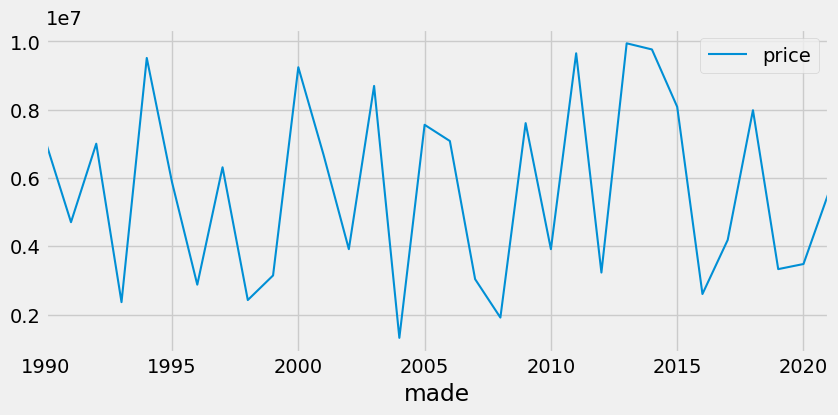

In [185]:
# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Plota os dados
fig, ax = plt.subplots(figsize=(9, 4))
paris['price'].plot(ax=ax, label='price')
ax.legend();

Train dates : 1990-01-01 00:00:00 --- 2009-01-01 00:00:00  (n=20)
Test dates  : 2010-01-01 00:00:00 --- 2021-01-01 00:00:00  (n=12)


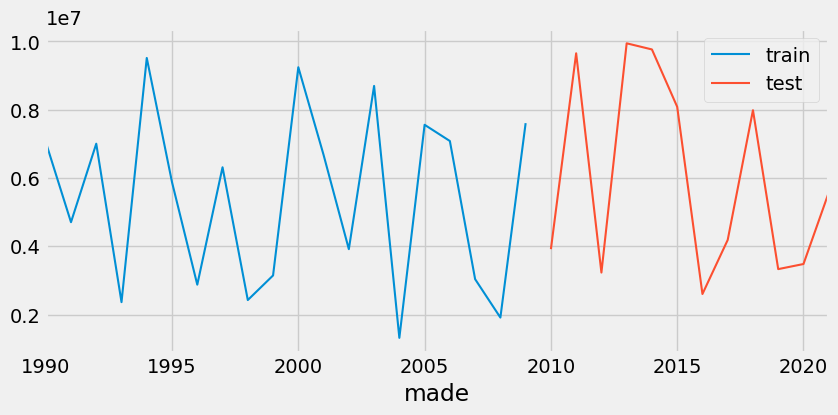

In [186]:
# Divide dados em treinamento e teste
# Para séries temporais, sempre utilizamos os dados mais recentes para teste
steps = 12
data_train = paris[:-steps]
data_test  = paris[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(9, 4))
data_train['price'].plot(ax=ax, label='train')
data_test['price'].plot(ax=ax, label='test')
ax.legend();

In [187]:
pip install pmdarima

In [188]:
from pmdarima.arima import auto_arima
import pandas as pd

# Use o auto_arima para encontrar os melhores parâmetros do modelo ARIMA
model = auto_arima(
    data_train['price'],
    seasonal=True,
    m=12,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    max_order=None,
)

# Treine o modelo
model.fit(data_train['price'])

# Previsão
forecast = model.predict(n_periods=len(data_test))

# Converte para um dataframe
forecast = pd.DataFrame(forecast,index = data_test.index,columns=['Prediction'])
forecast

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (8) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=274.397, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=267.875, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=265.459, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=281.115, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=270.754, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=263.460, Time=0.03 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=265.455, Time=0.10 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=266.516, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=266.825, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=282.959, Time=0.04 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=270.895, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=261.726, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12]             : AIC=263.004, Time=0.07 sec
 ARIMA(1,0,0)(0,1,1)[12]             

,Prediction
made,
2010-01-01,1.624097e+06
2011-01-01,3.647806e+06
2012-01-01,8.933315e+06
2013-01-01,6.871137e+06
2014-01-01,3.797286e+06
2015-01-01,8.771748e+06
2016-01-01,1.274222e+06
2017-01-01,7.588059e+06
2018-01-01,7.066084e+06


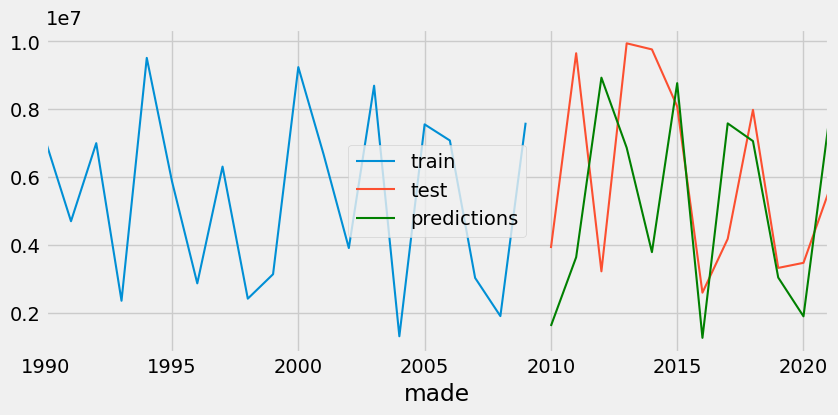

In [189]:
fig, ax = plt.subplots(figsize=(9, 4))
data_train['price'].plot(ax=ax, label='train')
data_test['price'].plot(ax=ax, label='test')
forecast['Prediction'].plot(ax=ax, label='predictions', color='green')
ax.legend()